In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data2 = pd.read_csv('final_data2.csv')

In [3]:
data2.duplicated().sum()

73

In [4]:
data2.shape

(1183, 10)

In [5]:
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission
0,2015 Lexus IS 250 F,Used,"55,093 mi.","$25,997",Silver,Black,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,Gasoline,6-Speed Automatic
1,2019 Jeep Grand Cherokee Limited,Used,"46,465 mi.","$36,544",Slate Blue Pearlcoat,Black,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,Gasoline,Automatic
2,2019 Jeep Grand Cherokee Limited,Jeep Certified,"25,676 mi.","$36,910",Granite Crystal Clearcoat Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic
3,2018 Audi A3 2.0T Tech Premium,Used,"14,201 mi.","$29,379",Brilliant Black,Black,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,Gasoline,7-Speed Automatic with Auto-Shift
4,2019 Jeep Grand Cherokee Limited,Used,"8,000 mi.","$33,492",Sangria Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic


In [6]:
# looking for null values
data2.isnull().sum()

Title             0
Used              0
Mileage           0
Price             0
Exterior color    0
Interior color    0
Drive train       0
MPG               0
Fuel type         0
Transmission      0
dtype: int64

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1183 non-null   object
 1   Used            1183 non-null   object
 2   Mileage         1183 non-null   object
 3   Price           1183 non-null   object
 4   Exterior color  1183 non-null   object
 5   Interior color  1183 non-null   object
 6   Drive train     1183 non-null   object
 7   MPG             1183 non-null   object
 8   Fuel type       1183 non-null   object
 9   Transmission    1183 non-null   object
dtypes: object(10)
memory usage: 92.5+ KB


In [8]:
# cleaning and creating another column based on the MPG column
data2['mpg'] = data2.MPG.str[3:7]

In [9]:
# dropping duplicated values
data2.drop_duplicates(keep='first', inplace=True)

## Feature Engineering

In [10]:
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission,mpg
0,2015 Lexus IS 250 F,Used,"55,093 mi.","$25,997",Silver,Black,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,Gasoline,6-Speed Automatic,21–3
1,2019 Jeep Grand Cherokee Limited,Used,"46,465 mi.","$36,544",Slate Blue Pearlcoat,Black,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,Gasoline,Automatic,0–25
2,2019 Jeep Grand Cherokee Limited,Jeep Certified,"25,676 mi.","$36,910",Granite Crystal Clearcoat Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic,19–2
3,2018 Audi A3 2.0T Tech Premium,Used,"14,201 mi.","$29,379",Brilliant Black,Black,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,Gasoline,7-Speed Automatic with Auto-Shift,26–3
4,2019 Jeep Grand Cherokee Limited,Used,"8,000 mi.","$33,492",Sangria Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic,19–2


In [11]:
# Year Column
# created a column called Year to know what year is the car
# The first four letter of the Title column contain the year
data2['Year'] = data2.Title.str[:5].astype('int')

In [12]:
# Dropping Title and MPG columns
#data2.drop(['Title', 'MPG'], axis=1, inplace=True)

In [13]:
# Creating a column for the brand of the car which is included in the Title column
car_brands = [i.split() for i in data2.Title]
brand = [i[1] for i in car_brands]
data2['car_brand'] = brand
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission,mpg,Year,car_brand
0,2015 Lexus IS 250 F,Used,"55,093 mi.","$25,997",Silver,Black,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,Gasoline,6-Speed Automatic,21–3,2015,Lexus
1,2019 Jeep Grand Cherokee Limited,Used,"46,465 mi.","$36,544",Slate Blue Pearlcoat,Black,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,Gasoline,Automatic,0–25,2019,Jeep
2,2019 Jeep Grand Cherokee Limited,Jeep Certified,"25,676 mi.","$36,910",Granite Crystal Clearcoat Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic,19–2,2019,Jeep
3,2018 Audi A3 2.0T Tech Premium,Used,"14,201 mi.","$29,379",Brilliant Black,Black,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,Gasoline,7-Speed Automatic with Auto-Shift,26–3,2018,Audi
4,2019 Jeep Grand Cherokee Limited,Used,"8,000 mi.","$33,492",Sangria Metallic,Black,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,Gasoline,8-Speed Automatic,19–2,2019,Jeep


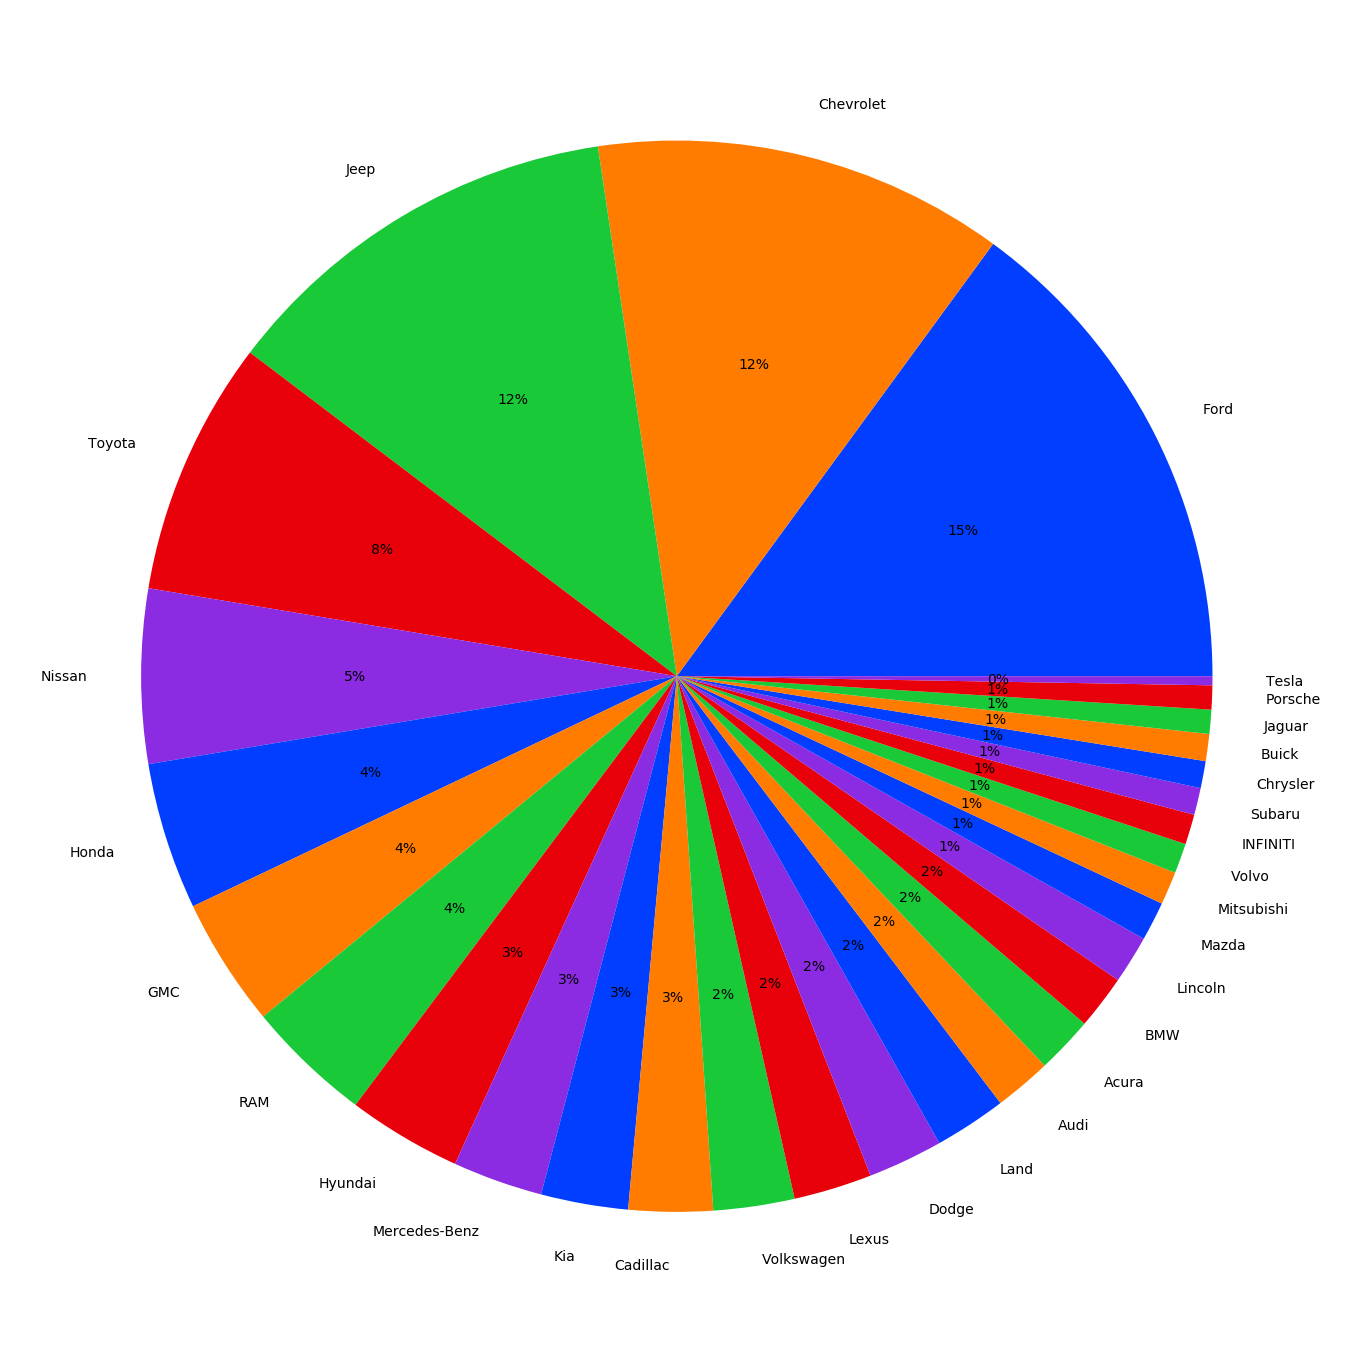

In [14]:
# Visualizing the different car brands that we have in the dataset

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(24,28))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data2.car_brand.value_counts().head(30), labels = data2.car_brand.value_counts().head(30).index, colors = colors, autopct='%.0f%%')
plt.show()

In [15]:
# Price column - y variable
# getting rid of non numerical items in the Price column to make it an int column
data2.Price = data2.Price.str.replace('$','')
data2.Price = data2.Price.str.replace(',','')

In [16]:
# dropping the rows that don't contain a price
rows_without_price = list(data2[data2.Price == 'Not Priced'].index)
data2 = data2.drop(rows_without_price)
data2.Price = data2.Price.astype("int")

In [17]:
# Mileage column
# getting rid of non numerical items in the Mileage column to make it an int column
data2.Mileage = data2.Mileage.str.replace('mi.','')
data2.Mileage = data2.Mileage.str.replace(',','')

In [18]:
# dropping the ros that don't contain a mileage 
Mileage = [i.strip() for i in list(data2.Mileage)]
data2.Mileage = Mileage
empty_rows_mileage = list(data2[data2.Mileage == ''].index)
data2 = data2.drop(empty_rows_mileage)
data2.Mileage = data2.Mileage.astype('int')

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1182
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1078 non-null   object
 1   Used            1078 non-null   object
 2   Mileage         1078 non-null   int64 
 3   Price           1078 non-null   int64 
 4   Exterior color  1078 non-null   object
 5   Interior color  1078 non-null   object
 6   Drive train     1078 non-null   object
 7   MPG             1078 non-null   object
 8   Fuel type       1078 non-null   object
 9   Transmission    1078 non-null   object
 10  mpg             1078 non-null   object
 11  Year            1078 non-null   int64 
 12  car_brand       1078 non-null   object
dtypes: int64(3), object(10)
memory usage: 117.9+ KB


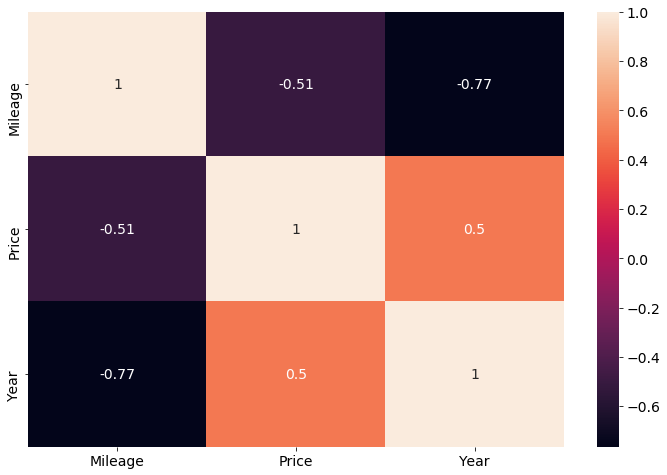

In [20]:
# heatmap of the numeric columns
numeric = data2.select_dtypes(exclude='object')
plt.figure(figsize = (12,8))
sns.heatmap(numeric.corr(), annot=True)
plt.show()

In [21]:
data2['Fuel type'].value_counts()

Gasoline          960
E85 Flex Fuel      39
Diesel             34
Hybrid             28
Electric           11
Flexible Fuel       4
–                   2
Name: Fuel type, dtype: int64

In [22]:
# Fuel Type column
# here if the fuel type has less than 50 data points I will set it to 1
# if it has more than 50 data poits I will set it to 0
fuel_type = data2['Fuel type'].value_counts()
list_other_fuel = list(fuel_type[fuel_type < 50].index)
data2['Fuel type'] = data2['Fuel type'].replace(list_other_fuel, 1)


list_1_fuel = list(fuel_type[fuel_type > 50].index)
data2['Fuel type'] = data2['Fuel type'].replace(list_1_fuel, 0)


In [23]:
# Exterior color column
# took the 8 most famous colors and replace their names with 1 and the rest just put a 0 in it
exterior_color = data2['Exterior color'].value_counts()

popular_colors = list(data2['Exterior color'].value_counts().head(8).index)
data2['Exterior color'] = data2['Exterior color'].replace(popular_colors, 1)

non_popular = list(exterior_color[exterior_color < 25].index)
data2['Exterior color'] = data2['Exterior color'].replace(non_popular, 0)


In [24]:
# Interior color column
# took the most famous color (black) and replace their names with 1 and the rest just put a 0 in it
interior_color = data2['Interior color'].value_counts()

popular_color = list(interior_color.head(1).index)
data2['Interior color'] = data2['Interior color'].replace(popular_color, 1)

non_popular = list(interior_color[interior_color < 400].index)
data2['Interior color'] = data2['Interior color'].replace(non_popular, 0)

In [25]:
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission,mpg,Year,car_brand
0,2015 Lexus IS 250 F,Used,55093,25997,1,1,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,0,6-Speed Automatic,21–3,2015,Lexus
1,2019 Jeep Grand Cherokee Limited,Used,46465,36544,0,1,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,0,Automatic,0–25,2019,Jeep
2,2019 Jeep Grand Cherokee Limited,Jeep Certified,25676,36910,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,8-Speed Automatic,19–2,2019,Jeep
3,2018 Audi A3 2.0T Tech Premium,Used,14201,29379,0,1,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,0,7-Speed Automatic with Auto-Shift,26–3,2018,Audi
4,2019 Jeep Grand Cherokee Limited,Used,8000,33492,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,8-Speed Automatic,19–2,2019,Jeep


In [26]:
# Transmission column

transmission_types = data2.Transmission.value_counts()
other_transmission_types = list(transmission_types[transmission_types < 255].index)
data2['Transmission'] = data2['Transmission'].replace(other_transmission_types, 0)

auto_transmission_types = list(transmission_types[transmission_types >= 255].index)
data2['Transmission'] = data2['Transmission'].replace(auto_transmission_types, 1)


data2['Transmission'].value_counts()

0    560
1    518
Name: Transmission, dtype: int64

In [27]:
# Used column
# if the Car is Used I will set it to 1, else I will se it to 0 
used_types = data2.Used.value_counts()
other_used_types = list(used_types[used_types < 836].index)
data2['Used'] = data2['Used'].replace(other_used_types, 0)
data2['Used'] = data2['Used'].replace("Used", 1)

data2.Used.value_counts().head()

1    836
0    242
Name: Used, dtype: int64

In [28]:
data2['Drive train'].value_counts()

 Front-wheel Drive     383
 Four-wheel Drive      276
 Rear-wheel Drive      238
 All-wheel Drive       125
 FWD                    30
 RWD                    11
 4WD                     9
 AWD                     5
 –                       1
Name: Drive train, dtype: int64

In [29]:
# Drive train
# Makes sense to do a dummy variable
dt_types = data2['Drive train'].value_counts()
other_dt_types = list(dt_types[dt_types < 126].index)
data2['Drive train'] = data2['Drive train'].replace(other_dt_types, "Other")
data2['Drive train'].value_counts().head()

 Front-wheel Drive     383
 Four-wheel Drive      276
 Rear-wheel Drive      238
Other                  181
Name: Drive train, dtype: int64

In [30]:
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission,mpg,Year,car_brand
0,2015 Lexus IS 250 F,1,55093,25997,1,1,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,0,1,21–3,2015,Lexus
1,2019 Jeep Grand Cherokee Limited,1,46465,36544,0,1,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,0,0,0–25,2019,Jeep
2,2019 Jeep Grand Cherokee Limited,0,25676,36910,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,1,19–2,2019,Jeep
3,2018 Audi A3 2.0T Tech Premium,1,14201,29379,0,1,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,0,0,26–3,2018,Audi
4,2019 Jeep Grand Cherokee Limited,1,8000,33492,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,1,19–2,2019,Jeep


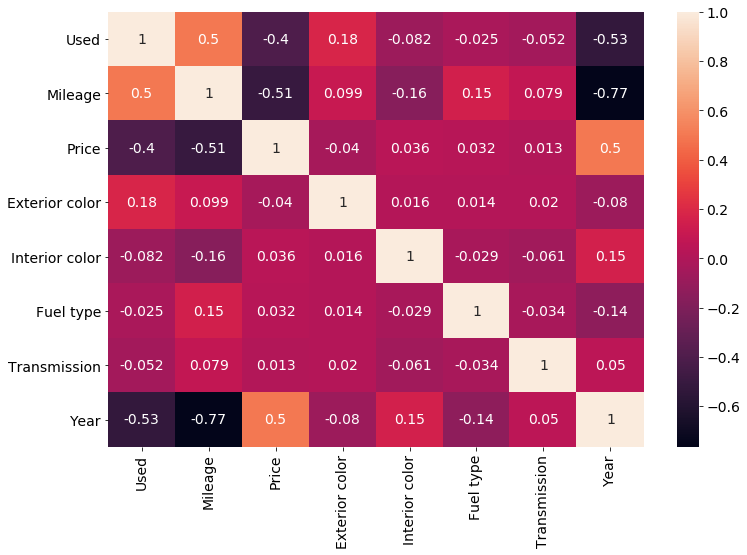

In [31]:
# another heatmap with the recently added numerical columns
plt.figure(figsize = (12,8))
sns.heatmap(data2.corr(), annot = True)
plt.show()

In [32]:
# using the Year column to define how old a car is

data2['yr_old'] = 2022 - data2.Year

In [33]:
data2.head()

,Title,Used,Mileage,Price,Exterior color,Interior color,Drive train,MPG,Fuel type,Transmission,mpg,Year,car_brand,yr_old
0,2015 Lexus IS 250 F,1,55093,25997,1,1,Rear-wheel Drive,\n\n21–30\n\n\n\nBased on EPA mileage ratings...,0,1,21–3,2015,Lexus,7
1,2019 Jeep Grand Cherokee Limited,1,46465,36544,0,1,Four-wheel Drive,\n\n0–25\n\n\n\nBased on EPA mileage ratings....,0,0,0–25,2019,Jeep,3
2,2019 Jeep Grand Cherokee Limited,0,25676,36910,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,1,19–2,2019,Jeep,3
3,2018 Audi A3 2.0T Tech Premium,1,14201,29379,0,1,Front-wheel Drive,\n\n26–35\n\n\n\nBased on EPA mileage ratings...,0,0,26–3,2018,Audi,4
4,2019 Jeep Grand Cherokee Limited,1,8000,33492,0,1,Rear-wheel Drive,\n\n19–26\n\n\n\nBased on EPA mileage ratings...,0,1,19–2,2019,Jeep,3


## Dummy variables

In [37]:
final_data = data2[['Used', 'Mileage', 'Price', 'Exterior color', 'car_brand', 'yr_old', 'mpg', 'Fuel type']]

In [38]:
# Luxury cars
luxury = ['Mercedes-Benz', 'Cadillac', 'Lexus', 'Audi', 'Acura', 'BMW', 'INFINITI', 'Land', 'Volvo', 
         'Lincoln', 'Maserati', 'Porsche', 'Jaguar', 'Tesla']

In [39]:
other_car_brands = list(final_data.car_brand.value_counts().index)
other_car_brands.remove('Mercedes-Benz')
other_car_brands.remove('Cadillac')
other_car_brands.remove('Lexus')
other_car_brands.remove('Audi')
other_car_brands.remove('Acura')
other_car_brands.remove('BMW')
other_car_brands.remove('INFINITI')
other_car_brands.remove('Land')
other_car_brands.remove('Volvo')
other_car_brands.remove('Lincoln')
other_car_brands.remove('Maserati')
other_car_brands.remove('Porsche')
other_car_brands.remove('Jaguar')
other_car_brands.remove('Tesla')
other_car_brands

['Ford',
 'Jeep',
 'Chevrolet',
 'Toyota',
 'Nissan',
 'Honda',
 'GMC',
 'RAM',
 'Hyundai',
 'Volkswagen',
 'Dodge',
 'Kia',
 'Mazda',
 'Mitsubishi',
 'Subaru',
 'Chrysler',
 'Buick',
 'Alfa',
 'MINI',
 'Scion']

In [40]:
data2['luxury'] = data2['car_brand'].replace(luxury, 1) 
data2['luxury'].replace(other_car_brands, 0, inplace=True)
data2['luxury']


0       1
1       0
2       0
3       1
4       0
       ..
1178    0
1179    1
1180    0
1181    0
1182    0
Name: luxury, Length: 1078, dtype: int64

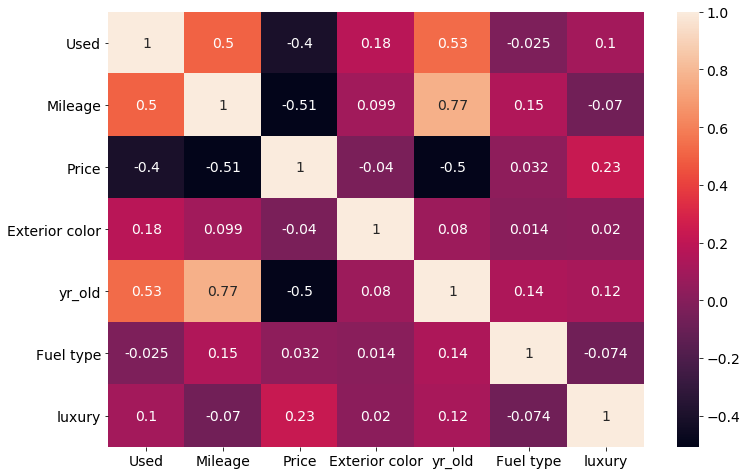

In [41]:
final_data = data2[['Used', 'Mileage', 'Price', 'Exterior color', 'car_brand', 'yr_old', 'mpg', 'Fuel type', 'luxury']]
final_data.head()
plt.figure(figsize = (12,8))
sns.heatmap(final_data.corr(), annot=True)
plt.show()

In [42]:
final_data.head()

,Used,Mileage,Price,Exterior color,car_brand,yr_old,mpg,Fuel type,luxury
0,1,55093,25997,1,Lexus,7,21–3,0,1
1,1,46465,36544,0,Jeep,3,0–25,0,0
2,0,25676,36910,0,Jeep,3,19–2,0,0
3,1,14201,29379,0,Audi,4,26–3,0,1
4,1,8000,33492,0,Jeep,3,19–2,0,0


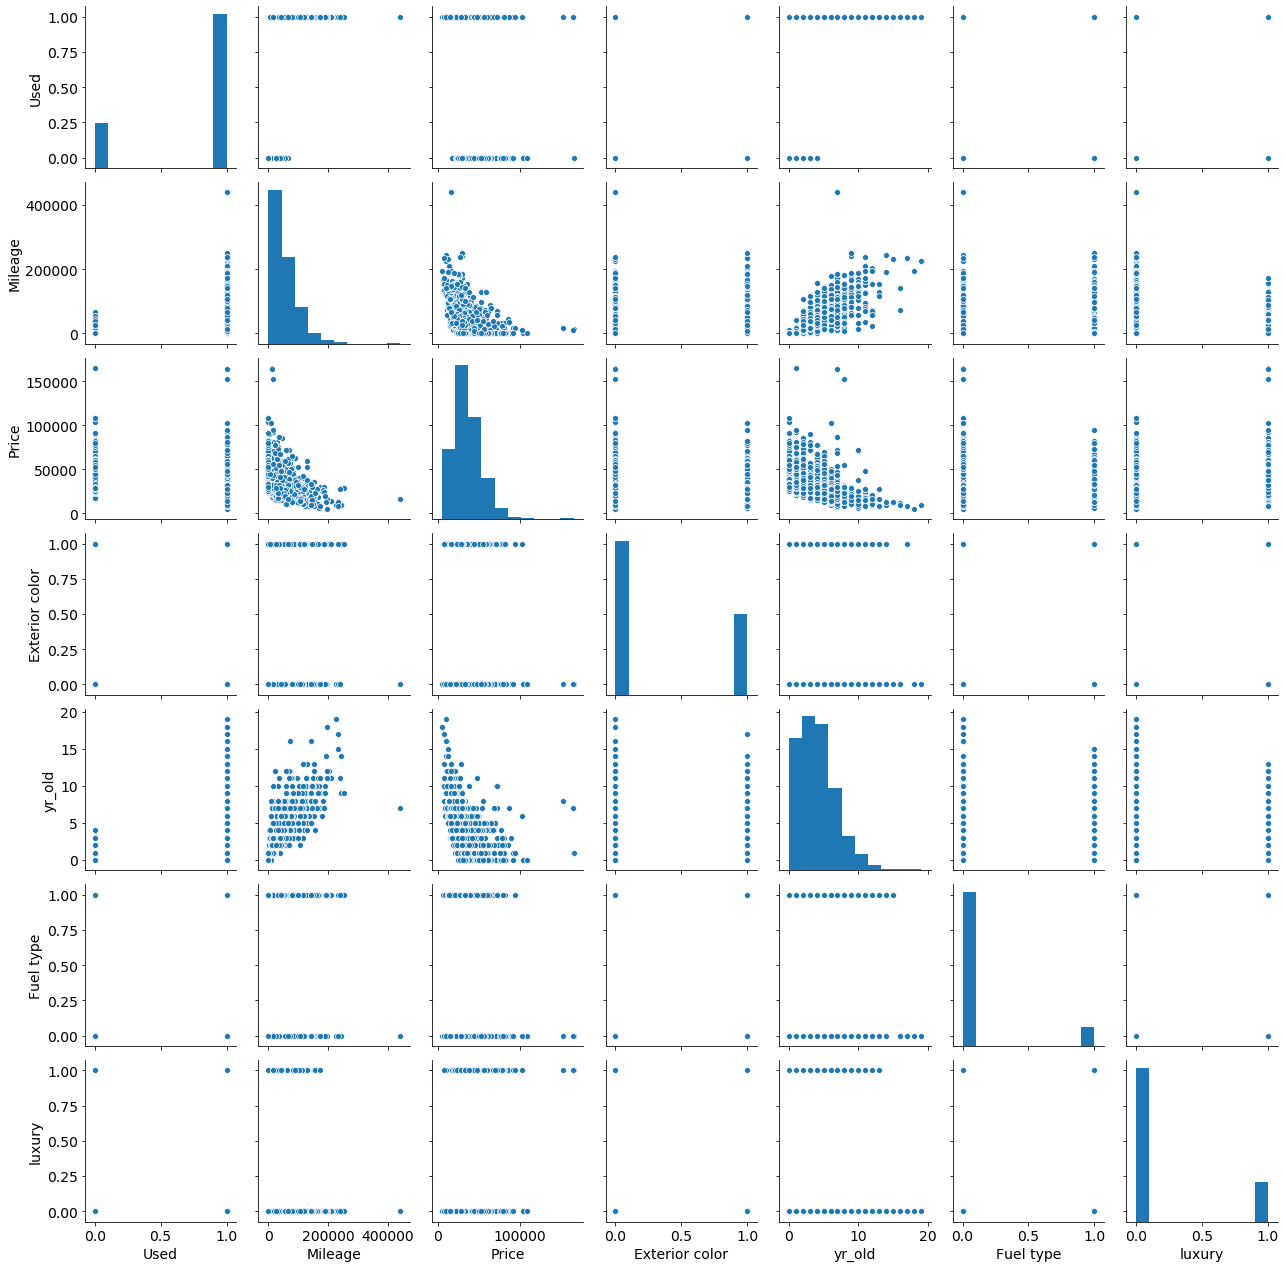

In [43]:
sns.pairplot(final_data)

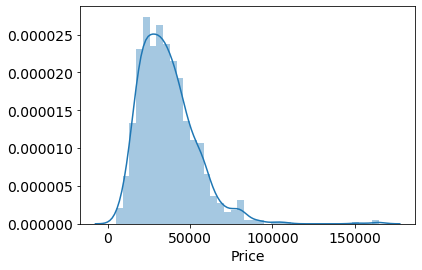

In [47]:
sns.distplot(final_data['Price'])
plt.show()

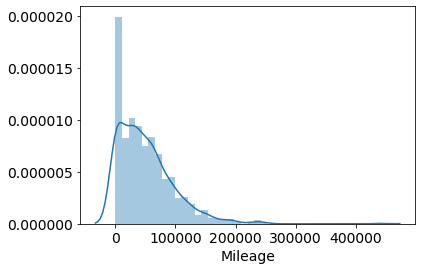

In [48]:
sns.distplot(final_data['Mileage'])
plt.show()

<Figure size 2880x3168 with 0 Axes>

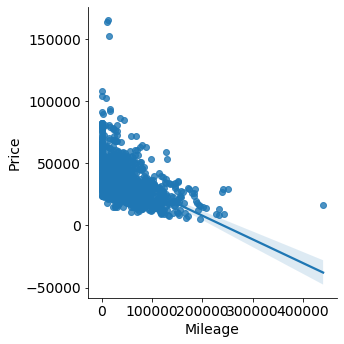

In [49]:
plt.figure(figsize=(40,44))
sns.lmplot(x='Mileage', y='Price', data=feature_df)
plt.show()

<Figure size 2880x3168 with 0 Axes>

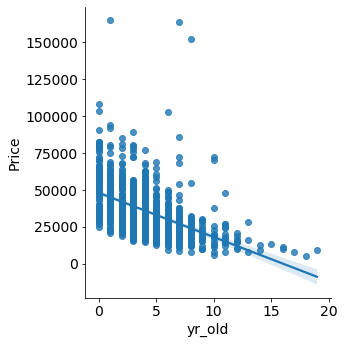

In [50]:
plt.figure(figsize=(40,44))
sns.lmplot(x='yr_old', y='Price', data=feature_df)
plt.show()

<Figure size 2304x2016 with 0 Axes>

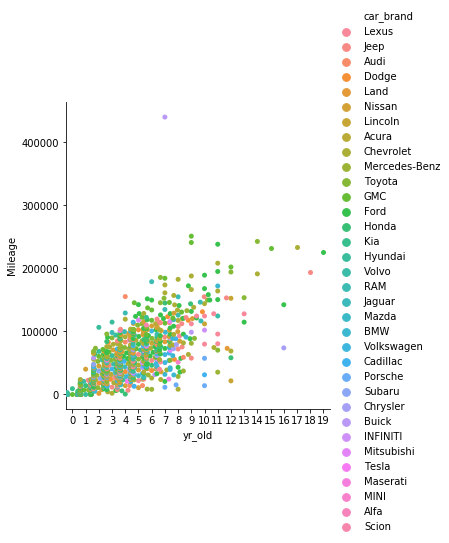

In [51]:
# As expected, older cars tend to have more miles
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(32,28))
sns.catplot(x="yr_old", y="Mileage", kind="swarm", hue='car_brand', data=final_data)
plt.show()

<Figure size 2304x2016 with 0 Axes>

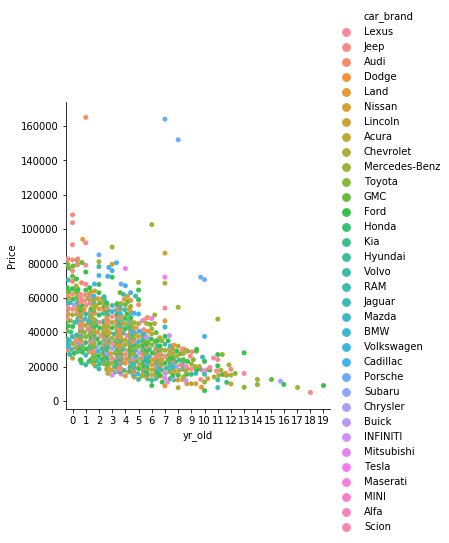

In [52]:
# As expected, newer cars tend to be pricier 
plt.figure(figsize=(32,28))
sns.catplot(x="yr_old", y="Price", kind="swarm", hue='car_brand', data=final_data)
plt.show()

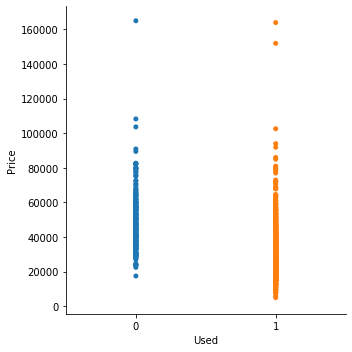

In [53]:
sns.catplot(x="Used", y="Price", jitter=False, data=feature_df)
plt.show()

## Removing outliers

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 2304x2016 with 0 Axes>

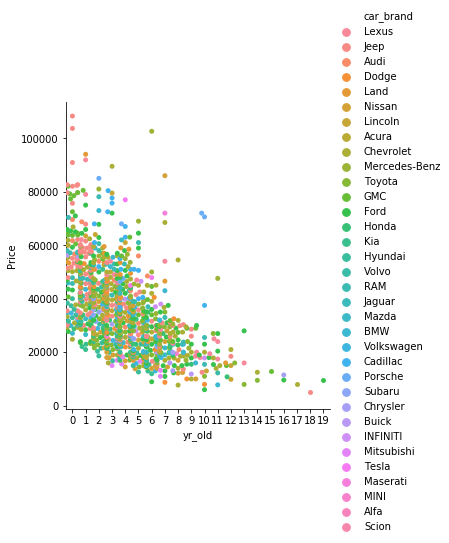

In [61]:
# Im removing the three datapoints from the chart above
final_data.drop(list(final_data[final_data.Price > 140000].index), inplace=True)
plt.figure(figsize=(32,28))
sns.catplot(x="yr_old", y="Price", kind="swarm", hue='car_brand', data=final_data)
plt.show()

In [62]:
# creating dummy variables for car_brand and mpg
feature_df = pd.get_dummies(final_data, drop_first=True)

In [63]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 0 to 1182
Columns: 111 entries, Used to mpg_91–9
dtypes: int64(7), uint8(104)
memory usage: 216.4 KB


In [64]:
feature_df.head()

,Used,Mileage,Price,Exterior color,yr_old,Fuel type,luxury,car_brand_Alfa,car_brand_Audi,car_brand_BMW,...,mpg_36–3,mpg_40–3,mpg_41–3,mpg_43–4,mpg_44–3,mpg_44–4,mpg_48–4,mpg_51–4,mpg_54–5,mpg_91–9
0,1,55093,25997,1,7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,46465,36544,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25676,36910,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,14201,29379,0,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8000,33492,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cross Validation

In [65]:
X = feature_df.drop('Price', axis=1)
y = feature_df.Price

In [67]:
X.head()

,Used,Mileage,Exterior color,yr_old,Fuel type,luxury,car_brand_Alfa,car_brand_Audi,car_brand_BMW,car_brand_Buick,...,mpg_36–3,mpg_40–3,mpg_41–3,mpg_43–4,mpg_44–3,mpg_44–4,mpg_48–4,mpg_51–4,mpg_54–5,mpg_91–9
0,1,55093,1,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,46465,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25676,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,14201,0,4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8000,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
import statsmodels.api as sm

# Create matrices for target, features
X = sm.add_constant(X)

# Define the model structure
model = sm.OLS(y, X)

# Fit the model
fit = model.fit()

# Print statistics of the fitted model
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     27.62
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          1.10e-228
Time:                        14:35:57   Log-Likelihood:                -11184.
No. Observations:                1075   AIC:                         2.259e+04
Df Residuals:                     966   BIC:                         2.313e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

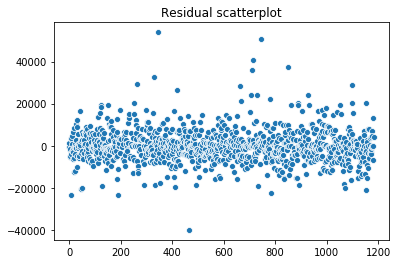

In [69]:
sns.scatterplot(data = fit.resid)
plt.title('Residual scatterplot')
plt.show()

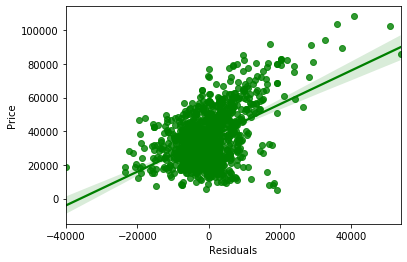

In [70]:
# OLS model
sns.regplot(x=fit.resid, y=y, color="g")
plt.xlabel("Residuals")
plt.show()

In [71]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# partition remaining data into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 3)

lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)


[0.72275914 0.6392596  0.66257658 0.68160787 0.7215795 ]


In [72]:
# Training score
lm = LinearRegression()
lm.fit(X_train, y_train)
train_score = lm.score(X_train, y_train)
train_score

0.7955806188860491

In [73]:
# Validation score
lm.score(X_val, y_val)

0.5067698532362808

In [ ]:
# Test score
lm = LinearRegression() 
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

## Validation

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# partition remaining data into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [75]:
# Score on training
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7634776983318576

In [76]:
# Score on Validation
model.score(X_val, y_val)

0.6355847835430943

In [ ]:
# Score on Test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression()
model.fit(X, y)
#model.score(X_test, y_test)

## Ridge model

In [77]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# partition remaining data into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [78]:
from sklearn.preprocessing import StandardScaler

# fit finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

# apply the scaler to the train set

X_tr = std.transform(X_train.values)

# Apply the scaler to the test set and validation

X_te = std.transform(X_test.values)
X_va = std.transform(X_val.values)

In [79]:
from sklearn.linear_model import RidgeCV

alphas = 10**np.linspace(-2, 2, 200)

ridge_model = RidgeCV(alphas = alphas, cv = 5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)

0.7427198800468712

In [80]:
# Validation score
ridge_model.score(X_va, y_val)

0.6505737991081337

In [ ]:
# Test Score
#ridge_model.score(X_test, y_test)

## Lasso Model

In [81]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# partition remaining data into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [82]:
from sklearn.preprocessing import StandardScaler

# fit finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

# apply the scaler to the train set

X_tr = std.transform(X_train.values)

# Apply the scaler to the test set and validation

X_te = std.transform(X_test.values)
X_va = std.transform(X_val.values)

In [83]:
from sklearn.linear_model import LassoCV

alphas = 10**np.linspace(-2, 2, 200)

lasso_model = LassoCV(alphas = alphas, cv = 5)
lasso_model.fit(X_tr, y_train)
lasso_model.score(X_tr, y_train)

0.7930371420867484

In [84]:
# Validation score
lasso_model.score(X_va, y_val)

0.5677534640698004

In [ ]:
# Test score
#lasso_model.score(X_test, y_test)